# COVID-19 စာတမ်းများကို ခွဲခြမ်းစိတ်ဖြာခြင်း

ဒီစိန်ခေါ်မှုမှာ COVID ကပ်ရောဂါအကြောင်းကို ဆက်လက်ဆန်းစစ်ပြီး၊ အဆိုပါအကြောင်းအရာနှင့်ပတ်သက်သော သိပ္ပံစာတမ်းများကို အဓိကထားလုပ်ဆောင်သွားမည်ဖြစ်သည်။ [CORD-19 Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) တွင် COVID အကြောင်းပါဝင်သော စာတမ်း ၇၀၀၀ ကျော် (ဒီစာရေးချိန်အချိန်အတိုင်း) ရှိပြီး၊ metadata နှင့် အကျဉ်းချုပ်များပါဝင်သည် (အနည်းဆုံးတစ်ဝက်ခန့်မှာ စာတမ်းအပြည့်အစုံပါဝင်သည်)။

ဒီ dataset ကို [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) cognitive service ကို အသုံးပြု၍ ခွဲခြမ်းစိတ်ဖြာထားသော အပြည့်အစုံနမူနာကို [ဒီ blog post](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) မှာ ဖော်ပြထားသည်။ ကျွန်ုပ်တို့ ဒီခွဲခြမ်းစိတ်ဖြာမှုရဲ့ ရိုးရှင်းတဲ့ဗားရှင်းကို ဆွေးနွေးသွားမည်။


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## ဒေတာရယူခြင်း

ပထမဦးဆုံး၊ ကျွန်တော်တို့အလုပ်လုပ်မယ့် CORD စာတမ်းများအတွက် metadata ကိုရယူဖို့လိုပါတယ်။

**NOTE**: ဒီ repository ရဲ့အပိုင်းတစ်ခုအနေနဲ့ dataset ကိုမပါဝင်ပေးထားပါဘူး။ သင်အရင်ဆုံး [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) ဖိုင်ကို [Kaggle ရဲ့ဒီ dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) မှာ download လုပ်ရပါမယ်။ Kaggle မှာ registration လုပ်ဖို့လိုအပ်နိုင်ပါတယ်။ သို့သော် registration မလိုအပ်ဘဲ [ဒီနေရာ](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html) မှာ download လုပ်နိုင်ပါတယ်၊ ဒါပေမယ့် metadata ဖိုင်အပြင် အပြည့်အစုံစာတမ်းများလည်းပါဝင်လာပါမယ်။

ကျွန်တော်တို့ online source မှတစ်ဆင့် ဒေတာကိုတိုက်ရိုက်ရယူဖို့ကြိုးစားပါမယ်၊ ဒါပေမယ့် မအောင်မြင်ပါက အထက်မှာဖော်ပြထားတဲ့အတိုင်း ဒေတာကို download လုပ်ဖို့လိုပါမယ်။ ထို့အပြင်၊ ဒေတာကိုနောက်ထပ်စမ်းသပ်ဖို့စီစဉ်ထားပါက download လုပ်ထားတာက စောင့်ဆိုင်းချိန်ကိုလျော့ချပေးနိုင်ပါတယ်။

> **NOTE** ဒီ dataset က အတော်လေးကြီးပါတယ်၊ အကြမ်းအားဖြင့် 1 Gb လောက်ရှိပြီး၊ အောက်ပါ code line က အချိန်အတော်ကြာနိုင်ပါတယ်! (~5 မိနစ်)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

ကျွန်ုပ်တို့သည် ယခုတွင် ထုတ်ဝေသည့်ရက်စွဲ ကော်လံကို `datetime` သို့ ပြောင်းလဲပြီး ထုတ်ဝေသည့်ရက်စွဲများ၏ အကွာအဝေးကို ကြည့်ရှုရန် ဟစ်စတိုဂရမ်ကို ရေးဆွဲပါမည်။


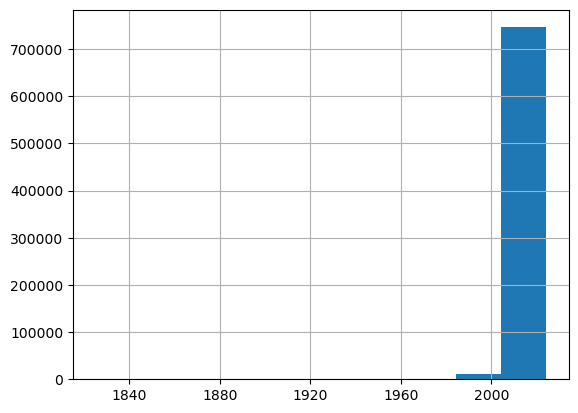

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## ဖွဲ့စည်းထားသော ဒေတာထုတ်ယူမှု

အကျဉ်းချုပ်များမှ အလွယ်တကူထုတ်ယူနိုင်သော အချက်အလက်အမျိုးမျိုးကို ကြည့်ကြမယ်။ ကျွန်တော်တို့စိတ်ဝင်စားနိုင်တဲ့အရာတစ်ခုကတော့ ကုသမှုနည်းလမ်းများ ဘယ်လိုရှိပြီး အချိန်အတောအတွင်း ဘယ်လိုတိုးတက်လာခဲ့သလဲဆိုတာကို သိရန်ဖြစ်ပါတယ်။ အစမှာတော့ COVID ကိုကုသရန် အသုံးပြုနိုင်သော ဆေးဝါးများနှင့် ရောဂါရှာဖွေမှုများ၏ စာရင်းကို ကိုယ်တိုင်စုစည်းရပါမယ်။ ထို့နောက် အဲဒီစာရင်းများကို ပြန်လည်သုံးသပ်ပြီး စာတမ်းများ၏ အကျဉ်းချုပ်များတွင် သက်ဆိုင်သော စကားလုံးများကို ရှာဖွေပါမယ်။


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


ကျွန်တော်တို့ dataframe မှာ column အများကြီး ထည့်သွင်းပြီး၊ abstract ထဲမှာ သတ်မှတ်ထားတဲ့ ဆေးဝါး/ရောဂါခွဲခြားမှု တစ်ခုစီ ရှိနေတဲ့ အကြိမ်ရေကို ထည့်သွင်းထားပါတယ်။

> **Note** အနေနဲ့ substring ရှာဖွေတဲ့အခါမှာ စာလုံးရဲ့အစမှာ space ထည့်သွင်းပေးရပါတယ်။ ဒါမလုပ်ရင် ရလဒ်မှားယွင်းနိုင်ပါတယ်၊ အကြောင်းက *chloroquine* ကို *hydroxychloroquine* ဆိုတဲ့ substring ထဲမှာပါ ရှာတွေ့နိုင်လို့ပါ။ ထို့အပြင်, abstracts column ကို `str` အဖြစ်ပြောင်းပေးရတာက error တစ်ခုကို ရှောင်ရှားဖို့ပါ - `str` ကို ဖယ်ရှားပြီး ဘာဖြစ်မလဲ စမ်းကြည့်ပါ။

ဒေတာနဲ့ အလုပ်လုပ်ရတာ ပိုလွယ်ကူစေဖို့၊ ဆေးဝါးရေတွက်မှုတွေပါဝင်တဲ့ sub-frame ကို ခွဲထုတ်ပြီး၊ စုစုပေါင်း ဖြစ်ပေါ်မှုအရေအတွက်ကိုတွက်ချက်နိုင်ပါတယ်။ ဒါက အများဆုံး လူကြိုက်များတဲ့ ဆေးဝါးကို ဖော်ပြပေးပါတယ်။


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

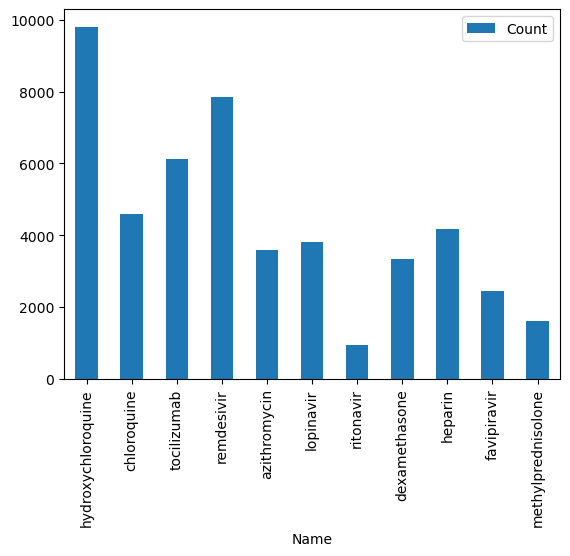

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## ကုသမှု မဟာဗျူဟာအတွက် လမ်းကြောင်းများ ရှာဖွေခြင်း

အထက်ပါ ဥပမာတွင် ကျွန်ုပ်တို့သည် တန်ဖိုးအားလုံးကို `sum` ဖြင့် စုစည်းခဲ့ပါသည်၊ သို့သော် ယင်းကိုလည်း လစဉ်အခြေပြု၍ ပြုလုပ်နိုင်ပါသည်။


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

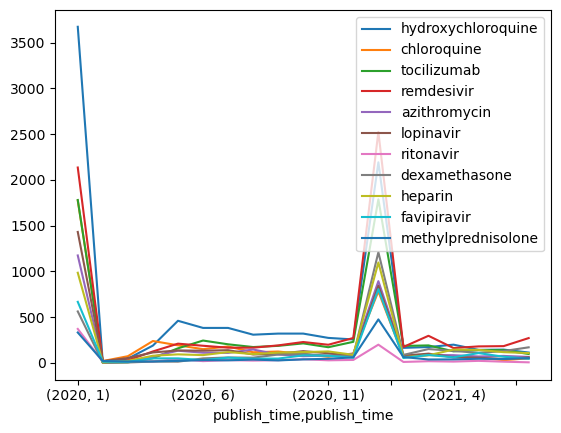

In [152]:
dfmt.plot()
plt.show()

အထင်ကရ သတိပေးချက်တစ်ခုကတော့၊ ၂၀၂၀ ခုနှစ် ဇန်နဝါရီလနဲ့ ၂၀၂၁ ခုနှစ် ဇန်နဝါရီလမှာ အလွန်မြင့်မားတဲ့ အချက်အလက်များ ရှိနေတယ်ဆိုတာပါ။ ဒါဟာ အချို့သော စာတမ်းတွေမှာ ထုတ်ဝေသည့်ရက်စွဲကို တိတိကျကျ ဖော်ပြထားခြင်းမရှိဘဲ၊ အဆိုပါနှစ်၏ ဇန်နဝါရီလအဖြစ် သတ်မှတ်ထားတဲ့အတွက် ဖြစ်ပါတယ်။

အချက်အလက်တွေကို ပိုမိုနားလည်နိုင်ဖို့အတွက်၊ ဆေးဝါးအနည်းငယ်ကိုသာ ရှုမြင်ကြည့်ကြမယ်။ ထို့အပြင် ဇန်နဝါရီလအတွက် အချက်အလက်တွေကို "ဖျက်ပစ်"ပြီး၊ အလယ်အလတ်တန်ဖိုးတစ်ခုနဲ့ ဖြည့်စွက်သွင်းထားမယ်၊ ဒါက ပိုမိုလှပတဲ့ ပုံစံတစ်ခုကို ရရှိစေဖို့အတွက် ဖြစ်ပါတယ်။


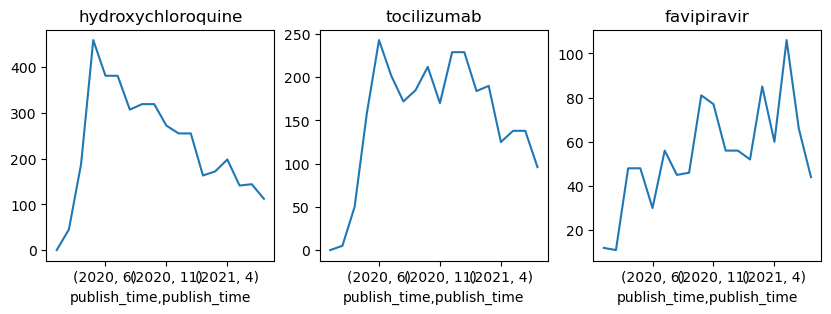

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

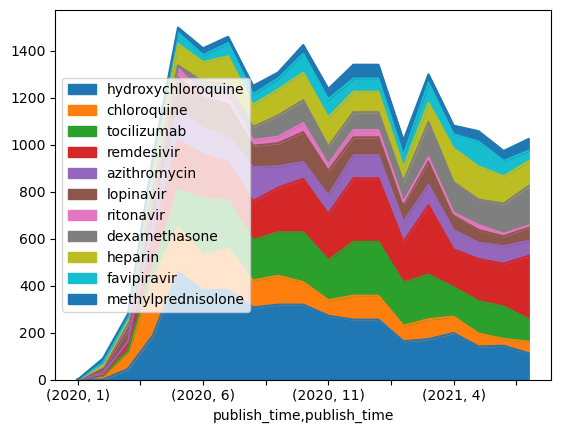

In [154]:
dfmt.plot.area()
plt.show()

တောင်တက်ပြီးတော့၊ ကျွန်ုပ်တို့သည် ရာခိုင်နှုန်းဖြင့် ဆွေမျိုးကျော်ကြားမှုကိုတွက်ချက်နိုင်ပါသည်။


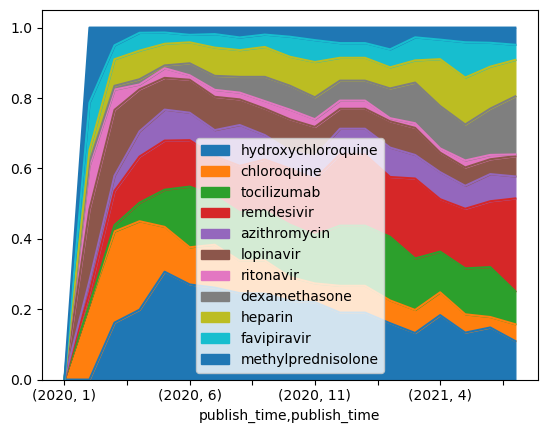

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## ဆေးဝါးနှင့်ရောဂါခွဲခြားမှုဆက်စပ်မှုကိုတွက်ချက်ခြင်း

အလွန်စိတ်ဝင်စားဖွယ်ရာဆက်စပ်မှုတစ်ခုကတော့ ရောဂါခွဲခြားမှုအမျိုးမျိုးကို ဆေးဝါးအမျိုးမျိုးဖြင့် ဘယ်လိုကုသကြောင်းကို ရှာဖွေခြင်းဖြစ်ပါတယ်။ ဒါကိုမြင်နိုင်ဖို့အတွက် **အတူတူဖြစ်ပေါ်မှုအကြိမ်ရေမြေပုံ** ကိုတွက်ချက်ဖို့လိုပါတယ်၊ ဒါကတော့ စာတမ်းတစ်စောင်ထဲမှာ စကားလုံးနှစ်ခုဘယ်နှစ်ကြိမ်ပါဝင်နေတယ်ဆိုတာကို ပြသပေးမယ့်အရာပါ။

ဒီမြေပုံဟာ အခြေခံအားဖြင့် 2D matrix တစ်ခုဖြစ်ပြီး၊ **numpy array** နဲ့အကောင်းဆုံးဖော်ပြနိုင်ပါတယ်။ ဒီမြေပုံကိုတွက်ချက်ဖို့အတွက် abstract အားလုံးကိုဖြတ်သန်းပြီး၊ အဲဒီမှာပါဝင်တဲ့ entity တွေကိုမှတ်သားသွားရမှာဖြစ်ပါတယ်။


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

ဤမက်ထရစ်ကိုမြင်နိုင်ရန်နည်းလမ်းများထဲမှတစ်ခုမှာ **အပူမြေပုံ** တစ်ခုကိုဆွဲခြင်းဖြစ်သည်။


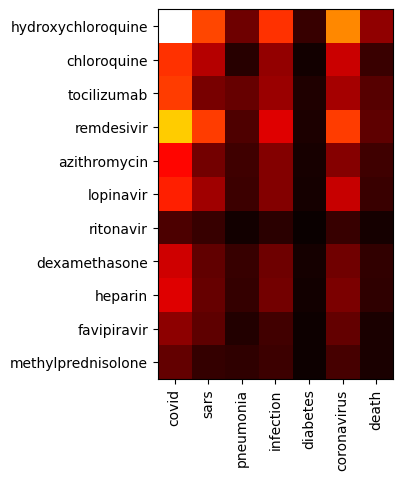

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

အခြေခံအားဖြင့် **Sankey** အကြောင်းအရာကို အသုံးပြု၍ ပိုမိုကောင်းမွန်သော ရုပ်ပုံဖော်ပြမှုကို ပြုလုပ်နိုင်ပါတယ်! `matplotlib` တွင် ဒီအမျိုးအစားရုပ်ပုံကို တိုက်ရိုက်ထောက်ပံ့မှု မရှိသေးပါ၊ ထို့ကြောင့် [Plotly](https://plotly.com/python/) ကို အသုံးပြုရမည်ဖြစ်ပြီး၊ [ဒီလမ်းညွှန်](https://plotly.com/python/sankey-diagram/) တွင် ဖော်ပြထားသည့်အတိုင်း လိုက်နာရပါမည်။

Plotly Sankey ရုပ်ပုံဖော်ရန် အောက်ပါစာရင်းများကို တည်ဆောက်ရမည်ဖြစ်သည် -
* `all_nodes` စာရင်း - ဤစာရင်းတွင် ဆေးဝါးများနှင့် ရောဂါခွဲခြားမှုများပါဝင်မည်။
* Source နှင့် Target အညွှန်းစာရင်းများ - ဤစာရင်းများသည် ရုပ်ပုံတွင် ဘယ်ဘက်နှင့်ညာဘက်သို့ သွားမည့် node များကို ဖော်ပြမည်။
* Link များစာရင်း - link တစ်ခုစီတွင် အောက်ပါအချက်များပါဝင်မည် -
   - `all_nodes` စာရင်းအတွင်းရှိ Source အညွှန်း
   - Target အညွှန်း
   - Link ၏ အားကောင်းမှုကို ဖော်ပြသည့် တန်ဖိုး။ ဤတန်ဖိုးသည် co-occurence matrix မှ တိုက်ရိုက်ရရှိသည့်တန်ဖိုးဖြစ်သည်။
   - လိုအပ်ပါက Link ၏ အရောင်။ ရှင်းလင်းမှုအတွက် အချို့သောအချက်များကို ထင်ရှားစေရန် အရောင်ကို အသုံးပြုနိုင်သည်။

Sankey ရုပ်ပုံကို ရေးဆွဲရန် အထွေထွေကုဒ်ကို `sankey` ဟုခေါ်သော သီးခြား function အဖြစ် ဖွဲ့စည်းထားပြီး၊ အဆိုပါ function သည် Source နှင့် Target အမျိုးအစားများနှင့် co-occurence matrix ကို လက်ခံသည်။ ထို့အပြင် threshold ကို သတ်မှတ်နိုင်ပြီး၊ ထို threshold ထက် အားနည်းသည့် Link များကို ဖယ်ရှားနိုင်သည် - ဤကိရိယာသည် ရုပ်ပုံကို ပိုမိုရိုးရှင်းစေသည်။


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## နိဂုံးချုပ်

သင်သည် စနစ်တကျ မဖွဲ့စည်းထားသော ဒေတာရင်းမြစ်များ (ဥပမာ - စာသားများ) မှ အချက်အလက်များကို ထုတ်ယူရန် အလွန်ရိုးရှင်းသော နည်းလမ်းများကို အသုံးပြုနိုင်ကြောင်း တွေ့ရှိခဲ့ပါသည်။ ဤဥပမာတွင် ကျွန်ုပ်တို့သည် ရှိပြီးသား ဆေးဝါးစာရင်းကို အသုံးပြုခဲ့ကြသော်လည်း၊ သဘာဝဘာသာစကားလုပ်ငန်းစဉ်များ (NLP) နည်းပညာများကို အသုံးပြု၍ စာသားမှ အဖွဲ့အစည်းများ (entities) ကို ထုတ်ယူခြင်းသည် ပိုမိုအစွမ်းထက်လိမ့်မည်။ [ဤဘလော့ဂ်ပို့စ်](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) တွင် အဖွဲ့အစည်းထုတ်ယူရန် ကောင်းကင်ဝန်ဆောင်မှုများကို မည်သို့အသုံးပြုရမည်ကို ဖော်ပြထားပါသည်။ အခြားရွေးချယ်စရာတစ်ခုမှာ [NLTK](https://www.nltk.org/) ကဲ့သို့သော Python NLP စာကြည့်တိုက်များကို အသုံးပြုခြင်းဖြစ်ပြီး၊ NLTK ကို အသုံးပြု၍ စာသားမှ အချက်အလက်များကို မည်သို့ထုတ်ယူရမည်ကို [ဤနေရာ](https://www.nltk.org/book/ch07.html) တွင် ဖော်ပြထားပါသည်။


## စိန်ခေါ်မှု

COVID ဆိုင်ရာစာတမ်းဒေတာကို အောက်ပါလိုင်းများအတိုင်း ဆက်လက်လေ့လာပါ-

1. အမျိုးမျိုးသော ဆေးဝါးများ၏ ပေါင်းစည်းဖြစ်မှု မက်ထရစ်ကို တည်ဆောက်ပြီး၊ ဘယ်ဆေးဝါးများက မကြာခဏအတူတူ (ဥပမာ- တစ်ခုတည်းသော အကျဉ်းချုပ်တွင်) ဖော်ပြထားကြောင်း ကြည့်ရှုပါ။ ဆေးဝါးများနှင့် ရောဂါရှာဖွေမှုများအတွက် ပေါင်းစည်းဖြစ်မှု မက်ထရစ်ကို တည်ဆောက်ရန် ကုဒ်ကို ပြင်ဆင်နိုင်ပါသည်။
1. ဒီမက်ထရစ်ကို အပူမြေပုံ (heatmap) ဖြင့် ရှုထောင့်ဖော်ပြပါ။
1. ပိုမိုစိန်ခေါ်မှုအနေဖြင့် ဆေးဝါးများ၏ ပေါင်းစည်းဖြစ်မှုကို [chord diagram](https://en.wikipedia.org/wiki/Chord_diagram) ဖြင့် ရှုထောင့်ဖော်ပြရန် ကြိုးစားပါ။ [ဒီစာကြည့်တိုက်](https://pypi.org/project/chord/) သင့်အား chord diagram ကို ဆွဲရန် အကူအညီပေးနိုင်ပါသည်။
1. နောက်ထပ် စိန်ခေါ်မှုအနေဖြင့် အမျိုးမျိုးသော ဆေးဝါးများ၏ အလုံးအရေအတွက် (ဥပမာ- *နေ့စဉ် chloroquine 400mg သောက်ပါ* တွင် **400mg**) ကို ပုံမှန်အထူးသတ်မှတ်ချက်များ (regular expressions) အသုံးပြု၍ ထုတ်ယူကြည့်ပါ၊ ထို့နောက် ဆေးဝါးအမျိုးမျိုးအတွက် အလုံးအရေအတွက်များကို ပြသသည့် dataframe တစ်ခု တည်ဆောက်ပါ။ **မှတ်ချက်**- ဆေးဝါးအမည်နှင့် အနီးကပ် စာသားတစ်ဝိုက်တွင် ရှိသော ကိန်းဂဏန်းတန်ဖိုးများကို စဉ်စားပါ။



---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်ခြင်းတွင် အမှားများ သို့မဟုတ် မမှန်ကန်မှုများ ပါဝင်နိုင်ကြောင်း သတိပြုပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်သင့်ပါသည်။ အရေးကြီးသောအချက်အလက်များအတွက် လူ့ဘာသာပြန်ပညာရှင်များမှ အတည်ပြုထားသော ဘာသာပြန်ကို အသုံးပြုရန် အကြံပြုပါသည်။ ဤဘာသာပြန်ကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပာယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။
